### Problem statement
#### Our goal is to train a custom deep learning model to detect whether a person is wearing a mask or is not wearing a mask.

Importing libraries

In [1]:
import os
import matplotlib.pyplot as plt


### loading dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd

'/content'

In [4]:
!ls '/content/drive/My Drive/2020/Face Mask Detection Dataset'

with_mask  without_mask


In [5]:
print(len(os.listdir('/content/drive/My Drive/2020/Face Mask Detection Dataset/with_mask')))

690


In [6]:
print(len(os.listdir('/content/drive/My Drive/2020/Face Mask Detection Dataset/without_mask')))

686


### Filenames

In [7]:
base_dir = "/content/drive/My Drive/2020"
train_dir=os.path.join(base_dir,'Face Mask Detection Dataset')
mask_dir = os.path.join(train_dir,'with_mask')
withoutmask_dir = os.path.join(train_dir,'without_mask')

In [8]:
data_mask=os.listdir(mask_dir)
data_mask[:5]

['317-with-mask.jpg',
 'augmented_image_76.jpg',
 '173-with-mask.jpg',
 '163-with-mask.jpg',
 '467-with-mask.jpg']

In [9]:
data_nomask=os.listdir(withoutmask_dir)
data_nomask[:5]

['34.jpg', '264.jpg', 'augmented_image_314.jpg', '59.jpg', '128.jpg']

### Train and validation data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create a new generator
# load train data
train_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2).flow_from_directory(train_dir, class_mode="binary",subset="training", batch_size=128, target_size=(150, 150))
# load val data
val_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2).flow_from_directory(train_dir, class_mode="binary",subset="validation", batch_size=128, target_size=(150, 150))

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [11]:
train_generator

(128, 150, 150, 3)
(128,)


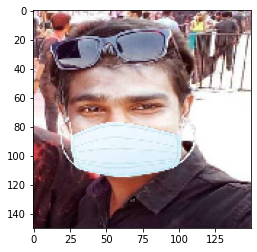

In [12]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

### Display set of images

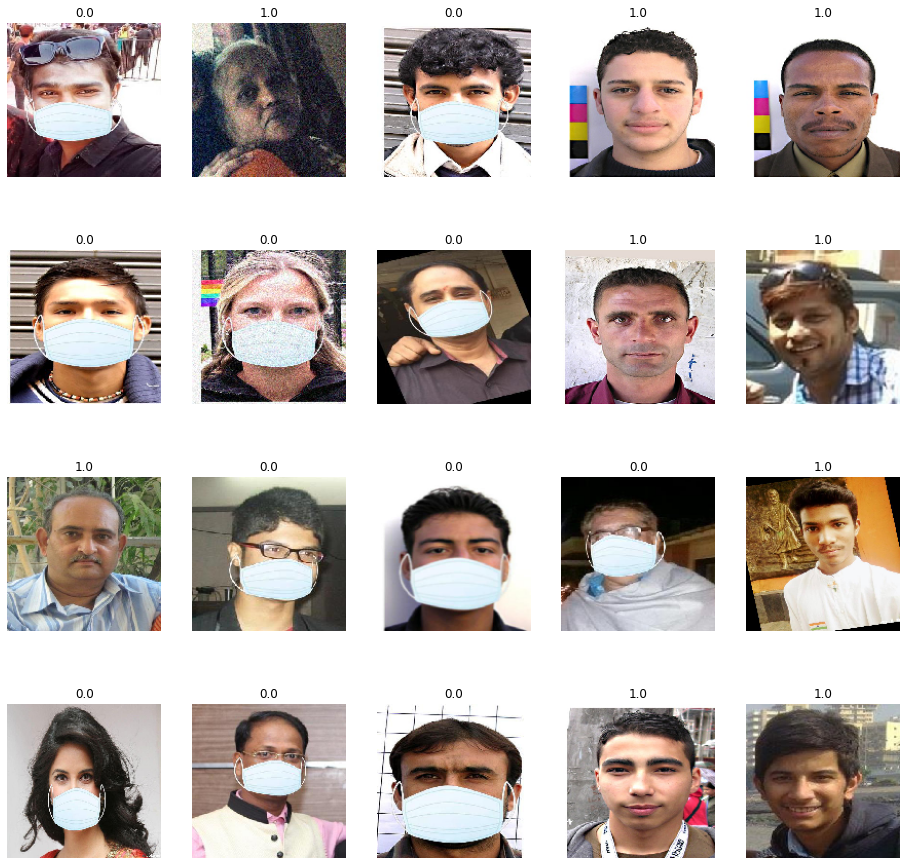

In [13]:
plt.figure(figsize=(16,16))
pos=1 ##plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])# To display the image
  plt.title(labels[i])
  plt.axis('off')
  pos+=1

### Histogram of data

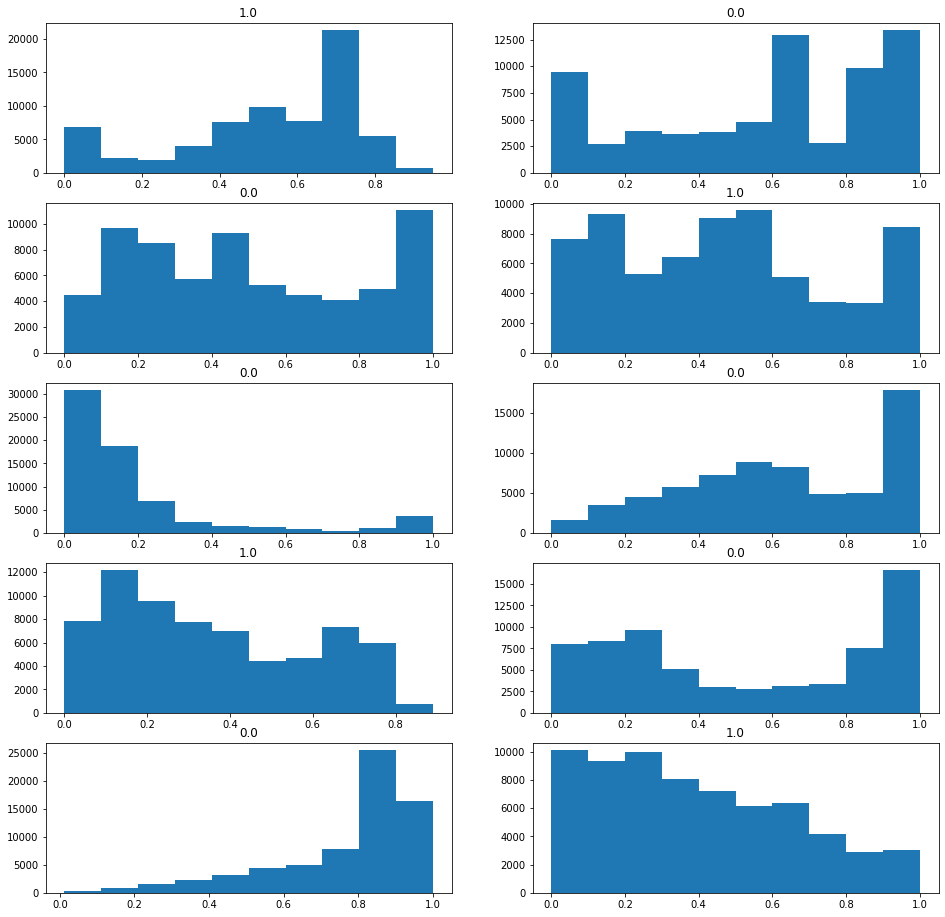

In [14]:
import matplotlib.pyplot as plt
imgs,labels = train_generator.next()
plt.figure(figsize=(16,16))
pos = 1  ## plot position
for i in range(10):
    plt.subplot(5,2,pos)
    plt.hist(imgs[i,:,:,:].flat) # To display the histogram
    plt.title(labels[i])
    pos += 1

### building a model

In [15]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [16]:
model = Sequential()
## add a conv layer folloed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer folloed by maxpooling
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D(2))
## add a conv layer folloed by maxpooling
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2))
# Convert the faeturemap into 1D array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

## let us see the the summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [17]:
### Compiling the modle
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

### Training model

In [18]:
history = model.fit(train_generator,epochs=15,validation_data=val_generator,batch_size=32)

Epoch 1/15
9/9 [==============================] - 23s 3s/step - loss: 2.1258 - accuracy: 0.5531 - val_loss: 0.5575 - val_accuracy: 0.7455
Epoch 2/15
9/9 [==============================] - 22s 2s/step - loss: 0.6699 - accuracy: 0.7103 - val_loss: 1.3511 - val_accuracy: 0.5018
Epoch 3/15
9/9 [==============================] - 23s 3s/step - loss: 0.7483 - accuracy: 0.7275 - val_loss: 0.5155 - val_accuracy: 0.6800
Epoch 4/15
9/9 [==============================] - 24s 3s/step - loss: 0.5446 - accuracy: 0.7965 - val_loss: 0.3876 - val_accuracy: 0.9200
Epoch 5/15
9/9 [==============================] - 23s 3s/step - loss: 0.2866 - accuracy: 0.9237 - val_loss: 0.1889 - val_accuracy: 0.9418
Epoch 6/15
9/9 [==============================] - 23s 3s/step - loss: 0.1222 - accuracy: 0.9609 - val_loss: 0.1586 - val_accuracy: 0.9418
Epoch 7/15
9/9 [==============================] - 26s 3s/step - loss: 0.3934 - accuracy: 0.8728 - val_loss: 0.1462 - val_accuracy: 0.9455
Epoch 8/15
9/9 [==================

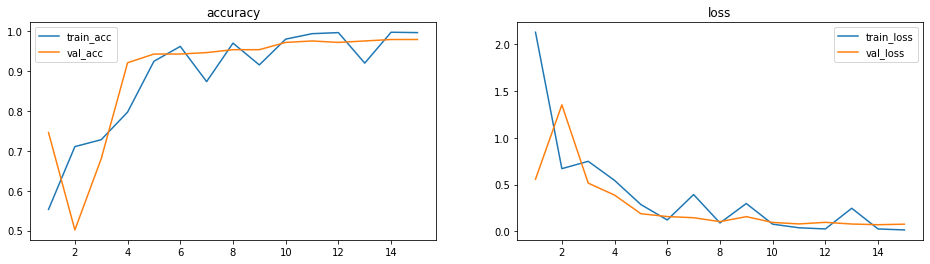

In [19]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1,16))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

### Predicted image with mask

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(183, 275, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


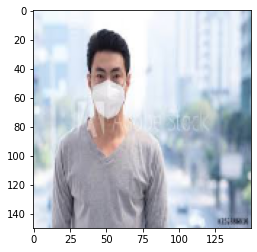

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/tmp/mask.jpg')
print(type(img))
#print(img.shape)
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))
## Scaling 
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)
plt.imshow(img[0,:,:,:])

In [21]:
model.predict(img)

array([[0.91225547]], dtype=float32)

### Predicting image without mask

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(236, 214, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


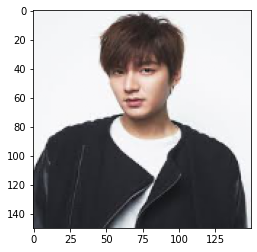

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/tmp/without_mask.jpg')
print(type(img))
#print(img.shape)
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))
## Scaling 
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)
plt.imshow(img[0,:,:,:])

In [26]:
model.predict(img)

array([[0.00057225]], dtype=float32)